# Assignment 1
## Part B - Facebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('dataset_Facebook.csv', sep = ';')

#### Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

In [4]:
attributes = ['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid']
outcomes = ['Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions']

There are missing values in 'Paid', 'like' and 'share' which will be filled later. "Type", "Category", "Post Month", "Post Weekday", "Post Hour" and "Paid" are category variables and will be converted before modelling.

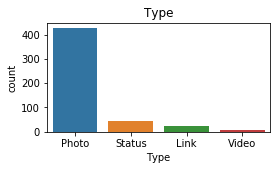

In [5]:
#visualize prevalence of values for each variable
for col in df.select_dtypes(exclude=[np.number]).columns.tolist():
    plt.figure(figsize=(4,2))
    sns.countplot(df[col])
    plt.title(col)

/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


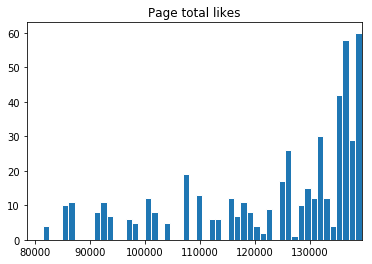

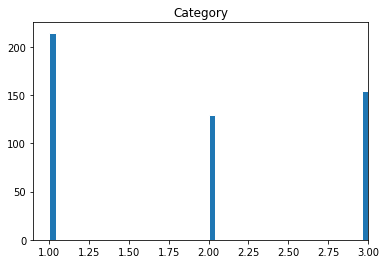

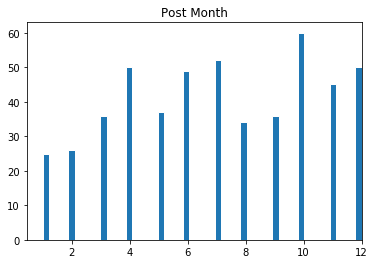

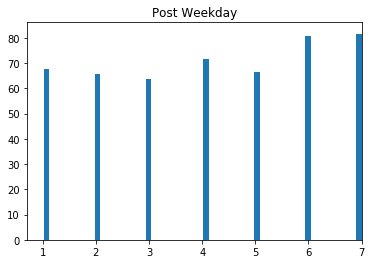

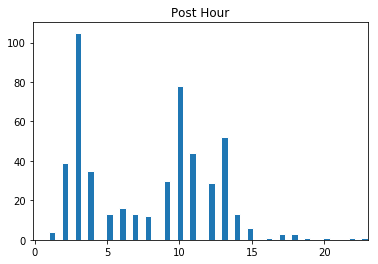

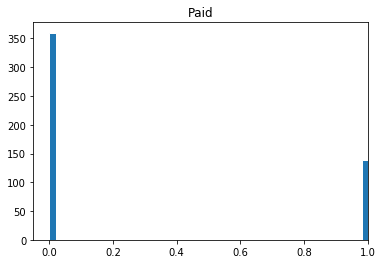

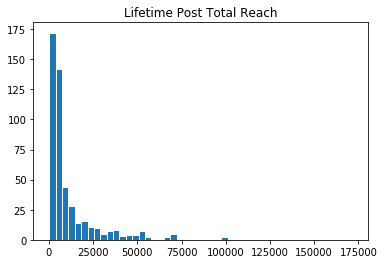

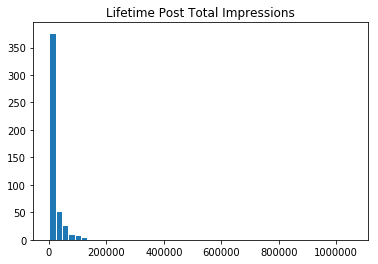

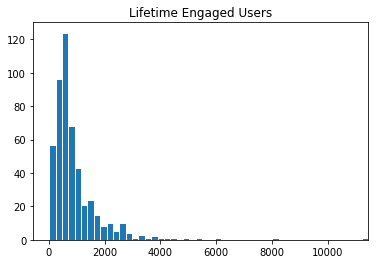

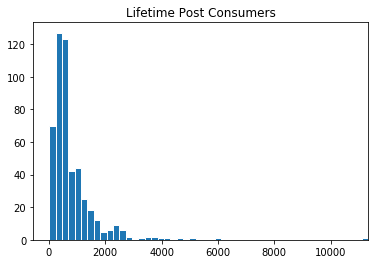

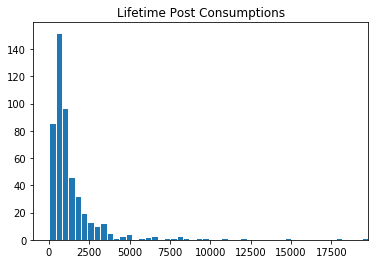

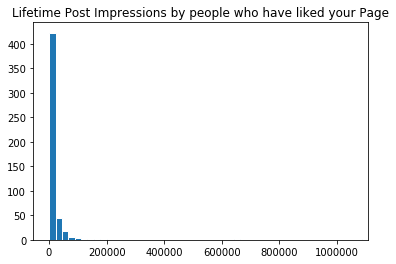

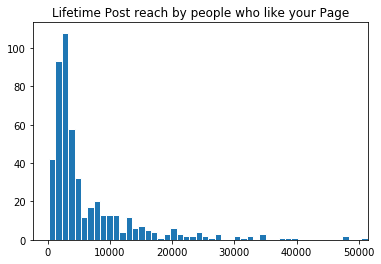

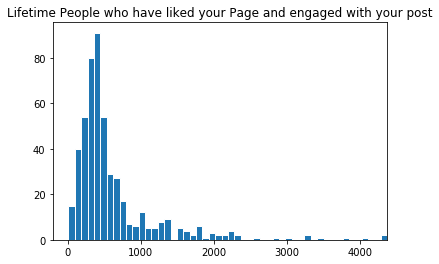

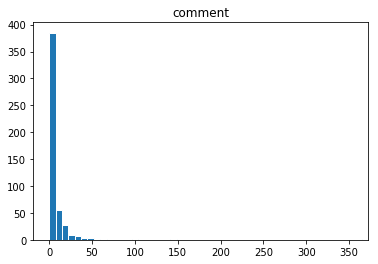

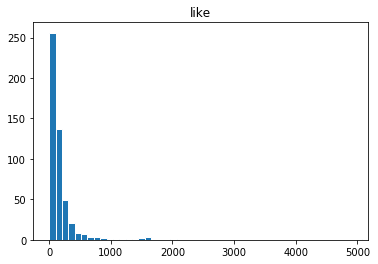

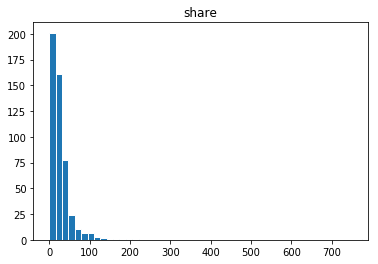

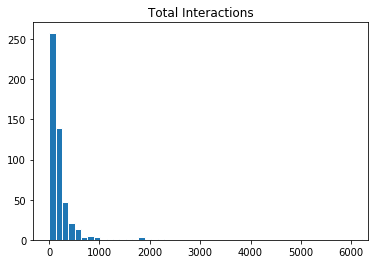

In [6]:
#visualize distributions of numerical variables
for col in df.select_dtypes(include=[np.number]).columns.tolist():
    fig, ax = plt.subplots()
    fig = plt.hist(df[col], bins=50, edgecolor='white')
    ax.set_xlim(right=df[col].max())
    plt.title(col)

In [7]:
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


Two output variables,'Lifetime Post Consumers', 'Lifetime Engaged Users', are selected for analysis for the purpose of this notebook. 

Based on the above histograms, the distributions of the output variables are extremely right skewed. 

To get some intuition on how the outcomes might vary with different input variables, extreme outliers are excluded in some of the visualizations for clarity. 

In [8]:
selected_outcomes = ['Lifetime Post Consumers', "Lifetime Engaged Users"]

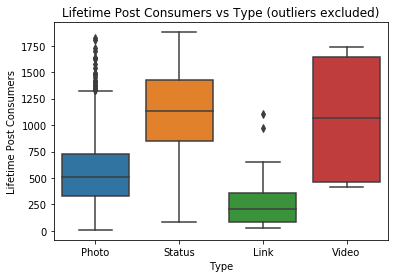

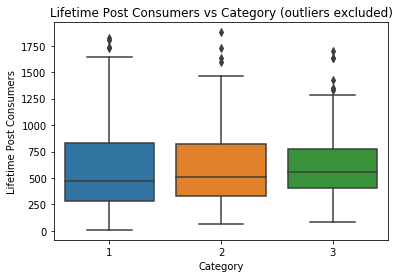

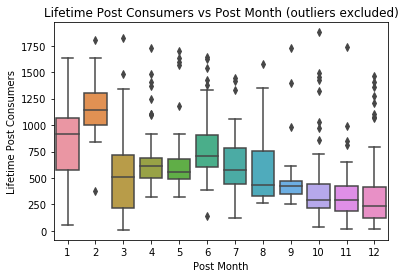

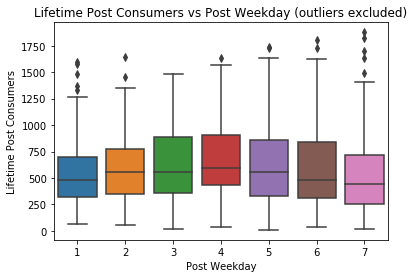

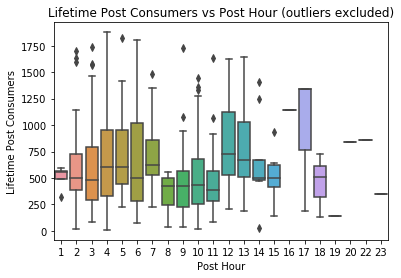

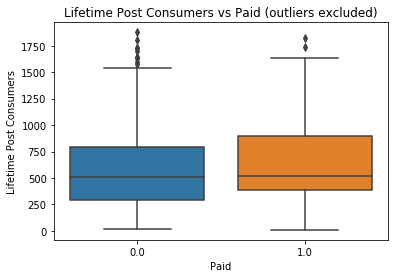

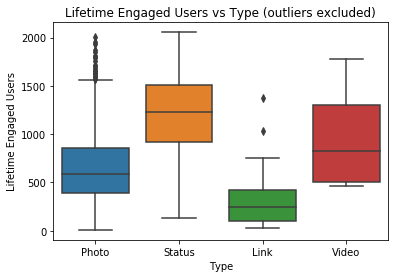

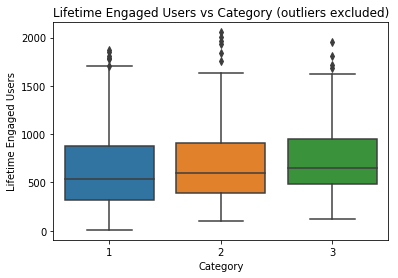

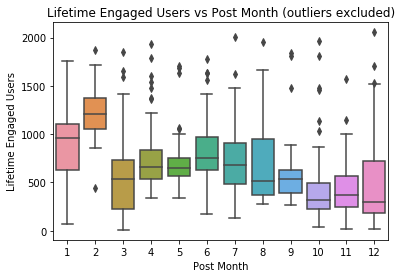

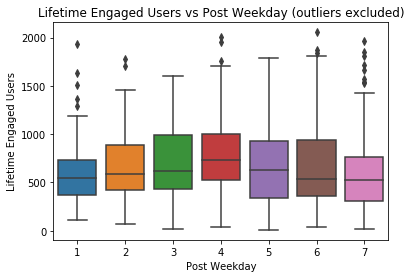

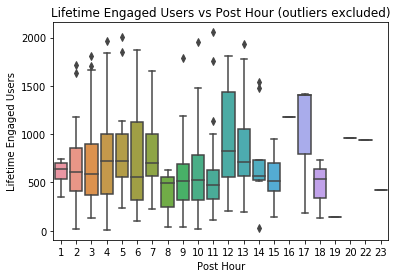

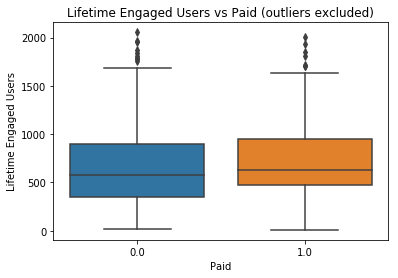

In [9]:
#visualize how attributes affect outcome variables
for outcome in selected_outcomes:
    for col in ['Type','Category','Post Month','Post Weekday','Post Hour','Paid']:
        plt.figure(figsize=(6,4))
        Q3 = df[outcome].quantile(q=0.75)
        IQR = df[outcome].quantile(q=0.75) - df[outcome].quantile(q=0.25)
        sns.boxplot(x=col,y=outcome,data=df[df[outcome]<=Q3+(1.5*IQR)]) #exclude outliers that are greater than 1.5IQR+Q3
        plt.title("{} vs {} (outliers excluded)".format(outcome,col))

'Type' and 'Post Month' appear to influence the two outcomes most, with 'Type' = 'Status'/'Video' and 'Post Month' = '1'/'2' having higher outcome values.

For 'Post Hour' and 'Post Month', there are 'clusters' which share similar distributions for the two outcome variables e.g.
- Post Hour: 1-7 / 8-11 / 12-15 / 16,19-23
- Post Month: 1-2/ 3-5 / 6-8 / 9-12 

We may want to group 'Post Hour' and 'Post Month' according to these clusters to reduce the number of features for modelling later on.

There is no discernible difference between different days of the week.

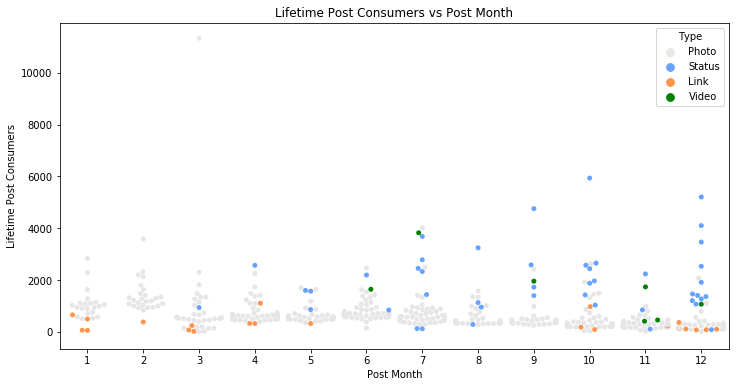

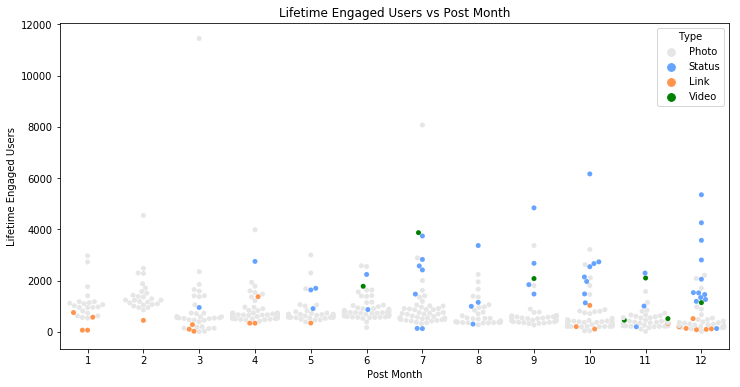

In [10]:
#visualize how 'Post Month' and "Type" affect outcome variables
for outcome in selected_outcomes:
    palette = ['#e6e6e6', '#66a3ff','#ff944d','#008000']
    plt.figure(figsize=(12,6))
    sns.swarmplot(y=outcome, x="Post Month",data=df, hue="Type", palette=palette)
    plt.title("{} vs Post Month".format(outcome))

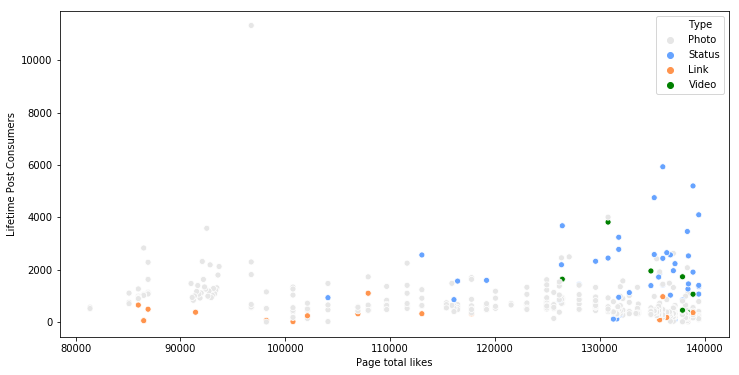

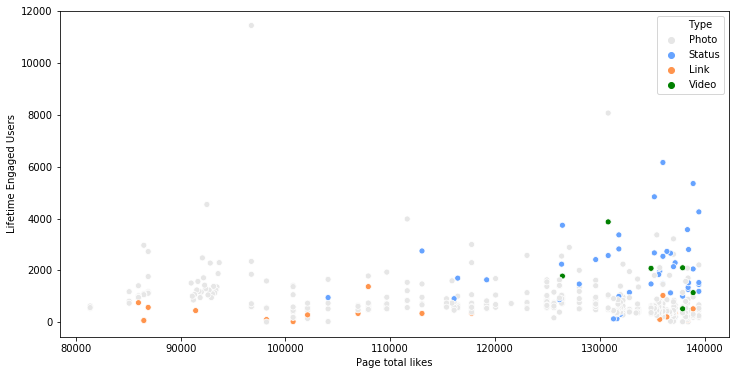

In [11]:
#visualize how 'Page total likes'and "Type" affect outcome variables
for outcome in selected_outcomes:
    palette = ['#e6e6e6', '#66a3ff','#ff944d','#008000']
    plt.figure(figsize=(12,6))
    sns.scatterplot(x='Page total likes', y=outcome, data=df,hue="Type", palette=palette)
    

"Status" posts tend to have better outcomes, and there appears to be a positive correlation between 'Page total likes' and outcomes for posts of this type.

"Link" posts tend to have poorer outcomes, while there are very few data points for "Video" which limits its predictive power.

Most of the outcome values are in the range of 0 - 4000. There are extreme outliers that are almost 3x of the upper bound of this range. These outliers will heavily impact model performance. As there are so few of them, we may want to consider them as anomalies and remove them before model training to improve the robustness and performance of the model trained.

#### Data cleaning/wrangling
##### Missing values

/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


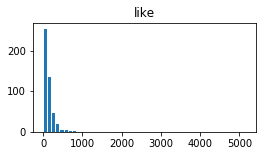

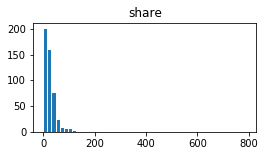

In [12]:
#visualize distribution of variables with missing values
for col in ['like','share']:
    plt.figure(figsize=(4,2))
    plt.hist(df[col], bins=50, edgecolor='white')
    plt.title(col)

In [13]:
df['Paid']=df['Paid'].astype('str')
df['Paid'].value_counts()

0.0    360
1.0    139
nan      1
Name: Paid, dtype: int64

Based on the distributions, 'Paid' will be filled with mode and 'like' and 'share' with the median

In [14]:
df['Paid'].replace('nan', df['Paid'].mode().item(), inplace=True)
for outcome in ['like','share']:
    df[outcome].fillna(df[outcome].median(), inplace=True)


##### Feature Engineering
As discussed earlier, 'Post Month' and 'Post Hour' may be clustered into groups. 

'weekday' will be created to differentiate between weekday/weekend
'TimeOfDay' will be created based on the distribution of outcome values by 'Post Hour'; those hours with few or no observations will be grouped together. 
'TImeOfYear' will be created based on the distribution of outcome values by 'Post Month'; 

Based on the visualizations earlier, we have:
- Post Hour: 1-7 / 8-11 / 12-15 / 16,19-23
- Post Month: 1-2/ 3-5 / 6-8 / 9-12

In [15]:
df['Post Hour'].value_counts()

3     105
10     78
13     52
11     44
2      39
4      35
9      30
12     29
6      16
5      13
14     13
7      13
8      12
15      6
1       4
17      3
18      3
22      1
16      1
19      1
20      1
23      1
Name: Post Hour, dtype: int64

Hours 16 - 23 have very few observations, they will be grouped together to form a single categorical value.

In [16]:
df['Post Month'].value_counts()

10    60
7     52
12    50
4     50
6     49
11    45
5     37
9     36
3     36
8     34
2     26
1     25
Name: Post Month, dtype: int64

In [17]:
#create new features for time of post
df['weekday'] = 1
df.loc[df['Post Weekday']>=6, 'weekday']=0

df['TimeOfDay']=pd.cut(df['Post Hour'], bins=[1,8,12,16,24], right=False, labels=["earlyAM","AM",'earlyPM',"PM_Night"])
df['TimeOfYear']= pd.cut(df['Post Month'], bins=[1,3,6,9,13], right=False, labels=["Jan-Feb","Mar-May",'Jun-Aug',"Sep-Dec"])


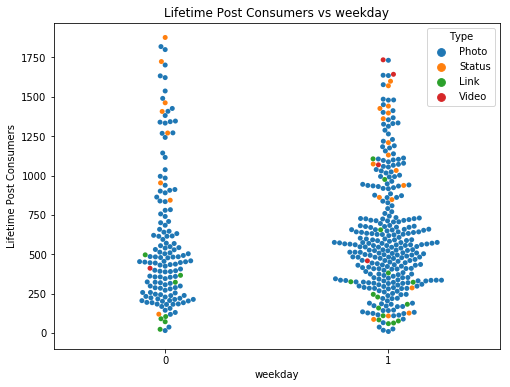

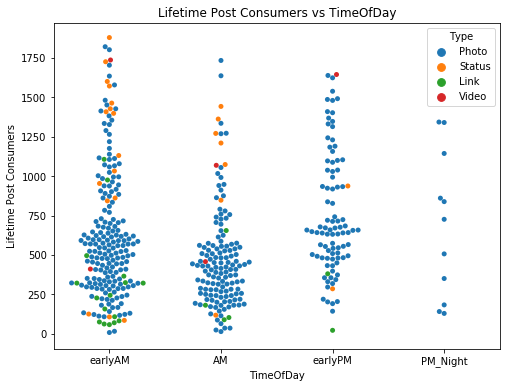

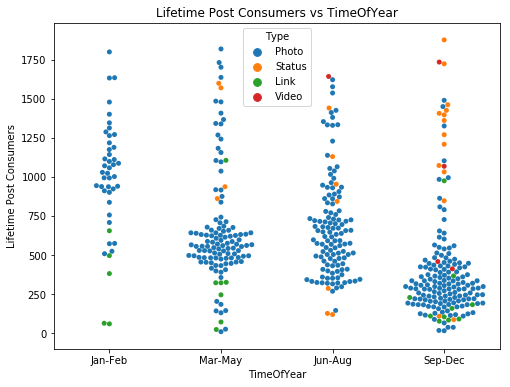

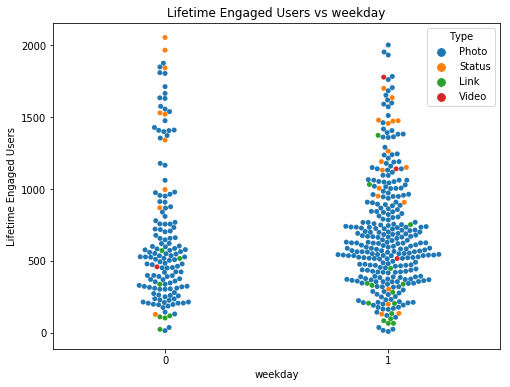

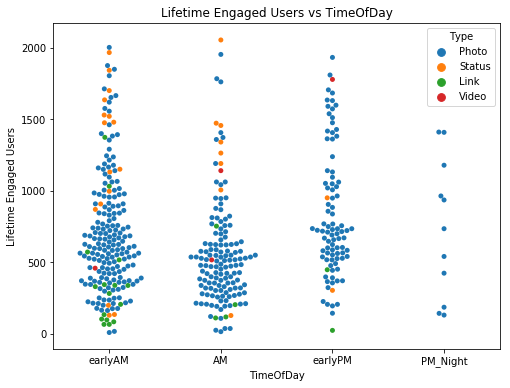

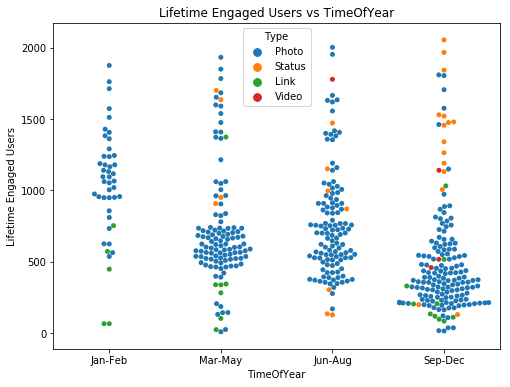

In [18]:
for outcome in selected_outcomes:
    Q3 = df[outcome].quantile(q=0.75)
    IQR = df[outcome].quantile(q=0.75) - df[outcome].quantile(q=0.25)
    df_removeoutliers  = df[df[outcome]<=Q3+(1.5*IQR)]
    for attr in ['weekday','TimeOfDay','TimeOfYear']:
        plt.figure(figsize=(8,6))
        sns.swarmplot(x = attr, y = outcome, data=df_removeoutliers, hue = "Type")
        plt.title("{} vs {}".format(outcome,attr))

#### Model training

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

##### Predicting outcome "Lifetime Post Consumers"

A test set will be held out for model evaluation. 

N-fold cross validation and grid search will be used on the training set to optimize models based on different machine learning algorithms. A final model will be selected based on the cross validation scores, and its performance will be evaluated on the test set.

4 machine learning algorithms are considered: Linear Regression, Random Forest Regression, Lasso and Gradient Boosting Regression. The last 3 algorithms provide a means of minimizing overfitting and/or improving on observations that are difficult to predict, which would be appropriate for this data which has a large number of features compared to the size of its data. GridSearchCV will be used to tune hyperparamters to optimize each model.

Linear Regression is relatively simple to implement and is highly interpretable and is so included to compare its performance against the other 3 algorithms.

Extreme outliers for the outcome variable will be removed before modelling as these will skew the model performance and generalizability.

Most of the input variables are categorical and will be transformed to dummy variables. 'Page total likes', the only numerical input variable, will be scaled prior to model training so that it is of the same order of magnitude as the other inputs. Otherwise, the disparity in absolute values would skew model training/prediction particularly for methods like linear regression.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   500 non-null object
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-null

In [21]:
#create input and output variables for model training
for col in ['Category','Post Month','Post Weekday', 'Post Hour']:
    df[col] = df[col].astype('str')

outcome = "Lifetime Post Consumers"

#exclude outliers
Q3 = df[outcome].quantile(q=0.75)
IQR = df[outcome].quantile(q=0.75) - df[outcome].quantile(q=0.25)
df_removeoutliers  = df[df[outcome]<=Q3+(1.5*IQR)]
    
def get_data(df, outcome):
   
    input_var = ['Page total likes', 'Type', 'Category', 'Paid', 'TimeOfDay', 'TimeOfYear','weekday']
    X = df[input_var]

    cat_var = ['Type', 'Category', 'weekday', 'TimeOfDay', 'TimeOfYear']   
    X = pd.get_dummies(X, columns=cat_var)
     
    y = df[outcome]
    
    return X,y

X,y = get_data(df_removeoutliers, outcome)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=43)

##### Linear Regression

In [22]:
import warnings
warnings.filterwarnings("ignore")

def linear_regression(X_train,y_train):
    linear_pipeline = Pipeline([('scaler', MinMaxScaler()),('linear', LinearRegression())]) #scaling is done on the n-1 folds for

    scores = cross_validate(linear_pipeline, X_train,y_train, cv=KFold(n_splits = 5, random_state=77),
                                scoring=('r2', 'neg_mean_absolute_error'))

    print("\nLinear Regression cross validation score:")
    print("MAE:{:.2f}".format(scores['test_neg_mean_absolute_error'].mean()))
    print("R2:{:.2f}".format(scores['test_r2'].mean()))
    
    return linear_pipeline.fit(X_train,y_train)

linear_model = linear_regression(X_train,y_train)

Linear Regression cross validation score:
MAE:-246.45
R2:0.25


##### Random Forest Regressor

In [23]:
def randomforestregression(X_train,y_train):
    pipeline = Pipeline([('scaler', MinMaxScaler()),('rf', RandomForestRegressor(random_state=11))]) #scaling is done on the n-1 folds for

    params = {'rf__n_estimators': np.arange(250,500,50), 'rf__max_features':np.arange(0.1,1.1), 
              'rf__min_samples_split':np.arange(2,10,2)}
    
    #optimize model by minimizing mean absolute error
    rfmodel = GridSearchCV(pipeline, params, cv=KFold(n_splits = 5, random_state=77), 
                                     scoring=['r2','neg_mean_absolute_error'], refit="neg_mean_absolute_error") 
    rfmodel.fit(X_train,y_train)

    #cross-validation score for optimized model
    print("\nRF Regressor Cross-validation score:")
    print("MAE:{:.2f}".format(rfmodel.best_score_))
    print("R2: {:.2f}".format(rfmodel.cv_results_['mean_test_r2'][rfmodel.best_index_]))
    print(rfmodel.best_params_)
    
    return rfmodel

rf_model = randomforestregression(X_train,y_train)

RF Regressor Cross-validation score:
MAE:-251.05
R2: 0.26
{'rf__max_features': 0.1, 'rf__min_samples_split': 4, 'rf__n_estimators': 400}


##### Lasso Regression

In [24]:
def LassoRegression(X_train,y_train):
    pipeline = Pipeline([('scaler', MinMaxScaler()),('lasso', Lasso())])

    params = {'lasso__alpha': np.linspace(1,10,100) }
    lassomodel = GridSearchCV(pipeline, params, cv=KFold(n_splits = 5, random_state=77), 
                              scoring=['r2','neg_mean_absolute_error'], refit="neg_mean_absolute_error")
    lassomodel.fit(X_train,y_train)

    #cross-validation score for optimized model
    print("\nLasso Cross-validation score:")
    print("MSE:{:.2f}".format(lassomodel.best_score_))
    print("R2: {:.2f}".format(lassomodel.cv_results_['mean_test_r2'][lassomodel.best_index_]))
    print(lassomodel.best_params_)
    
    return lassomodel

lasso_model = LassoRegression(X_train,y_train)


Lasso Cross-validation score:

MSE:-244.92
R2: 0.27
{'lasso__alpha': 2.0}


##### Gradient Boosting Regressor

In [25]:
def GradientBoostingRegression(X_train,y_train):
    pipeline = Pipeline([('scaler', MinMaxScaler()),('gbr', GradientBoostingRegressor(random_state=13))])

    params = {'gbr__n_estimators': np.arange(100,300,20), 'gbr__max_features':np.arange(0.1,1.1), 
              'gbr__learning_rate':np.arange(0.01,0.1,0.01)}

    gbrmodel = GridSearchCV(pipeline, params, cv=KFold(n_splits = 5, random_state=77), 
                              scoring=['r2','neg_mean_absolute_error'], refit="neg_mean_absolute_error")
    gbrmodel.fit(X_train,y_train)

    #cross-validation score for optimized model
    print("\nGradient Boosting Regression Cross-validation score:")
    print("MSE:{:.2f}".format(gbrmodel.best_score_))
    print("R2: {:.2f}".format(gbrmodel.cv_results_['mean_test_r2'][gbrmodel.best_index_]))
    print(gbrmodel.best_params_)
    
    return gbrmodel

gbr_model = GradientBoostingRegression(X_train,y_train)


Gradient Boosting Regression Cross-validation score:
MSE:-241.93
R2: 0.29
{'gbr__learning_rate': 0.06999999999999999, 'gbr__max_features': 0.1, 'gbr__n_estimators': 160}


For "Lifetime Post Consumers", the gradient boosting regressor gives the best cross validation score and will be used as the final model

##### Lifetime Engaged Users
Model training is repeated for the output variable "Lifetime Engaged Users" using the same approach. Records where there are extreme outliers for this output are removed prior to model traiing


In [26]:
# remove extreme outliers
outcome2 =  "Lifetime Engaged Users"
Q3 = df[outcome2].quantile(q=0.75)
IQR = df[outcome2].quantile(q=0.75) - df[outcome2].quantile(q=0.25)
df_removeoutliers_2  = df[df[outcome2]<=Q3+(1.5*IQR)]
len(df_removeoutliers_2)

456

In [27]:
# get input and output data and split into train/test set
X2,y2 = get_data(df_removeoutliers_2,outcome2) 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state=43)

#train data on different models and select based on best cross validation score
linear_model2 = linear_regression(X2_train,y2_train)
rf_model2 = randomforestregression(X2_train,y2_train)
lasso_model2 = LassoRegression(X2_train,y2_train)
gbr_model2 = GradientBoostingRegression(X2_train,y2_train)

Linear Regression cross validation score:
MAE:-283.51
R2:0.15
RF Regressor Cross-validation score:
MAE:-286.14
R2: 0.16
{'rf__max_features': 0.1, 'rf__min_samples_split': 8, 'rf__n_estimators': 350}
Lasso Cross-validation score:

MSE:-279.15
R2: 0.19
{'lasso__alpha': 3.7272727272727275}
Gradient Boosting Regression Cross-validation score:
MSE:-278.39
R2: 0.16
{'gbr__learning_rate': 0.05, 'gbr__max_features': 0.1, 'gbr__n_estimators': 180}


For "Lifetime Engaged Users", lasso gives the best cross validation score and will be used as the final model

#### Model Evaluation

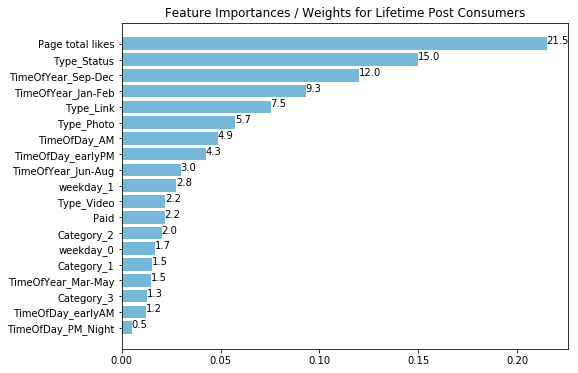

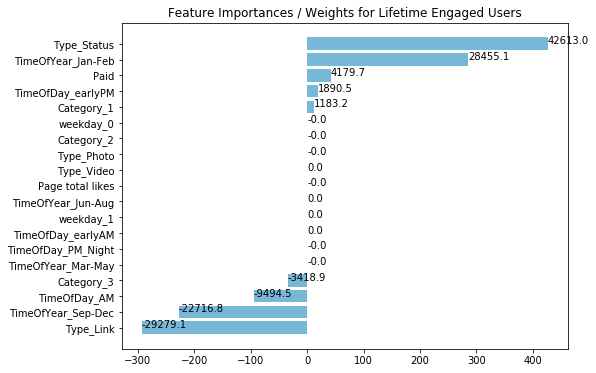

In [28]:
consumers = pd.Series(gbr_model.best_estimator_.named_steps['gbr'].feature_importances_, index=X.columns).sort_values(ascending=False)
users = pd.Series(lasso_model2.best_estimator_.named_steps['lasso'].coef_, index=X.columns).sort_values(ascending=False)

for name,importance in zip([outcome, outcome2],[consumers,users]):
    fig, ax = plt.subplots(figsize=(8,6))
    ypos = np.arange(0,len(importance))[::-1]
    ax.barh(ypos,importance.values, color='#77B7D8')

    ax.set_yticks(ypos)
    ax.set_yticklabels(importance.index)

    for i,value in zip(ypos, importance.values):
        ax.annotate("{:.1f}".format(value*100), xy=(value, i))

    plt.title("Feature Importances / Weights for {}".format(name))

For both models, feature importances show a similar trend, where "Page total likes", "Type" and "TimeOfYear" are have the largest importances. In particular, Type Status and Time of Year in Jan-Feb/Sep-Dec appear to have a bigger impact on the model predictions.

Test performance (Lifetime Post Consumers):
MSE:93219.19, R2:0.34, MAE:211.93
MSE Percentage 64.17

Test performance (Lifetime Engaged Users):
MSE:127001.75, R2:0.38, MAE:256.52
MSE Percentage 72.36



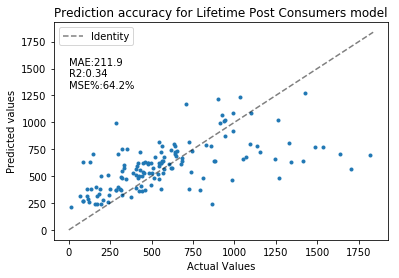

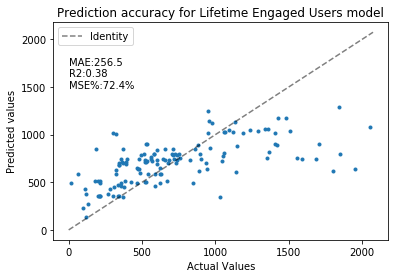

In [29]:
def evaluate_model(model,X_test,y_test, name):
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)
    print("Test performance ({}):\nMSE:{:.2f}, R2:{:.2f}, MAE:{:.2f}".format(name,MSE,R2,MAE))
    mse_percent = sum((abs(y_test - y_pred)/y_test)*100/len(y_test))
    print("MSE Percentage {:.2f}\n".format(mse_percent))
    
    max_scale = max(y_test.max(),y_pred.max())
    fig, ax = plt.subplots()
    plt.scatter(y_test, y_pred, marker='.')
    plt.plot(np.arange(0,max_scale*1.01), np.arange(0,max_scale*1.01), 'k--', alpha=0.5, label = "Identity")
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted values")
    ax.set_title("Prediction accuracy for {} model".format(name))
    plt.legend()
    ax.text(0,max_scale*0.8,"MAE:{:.1f}\nR2:{:.2f}\nMSE%:{:.1f}%".format(MAE,R2, mse_percent), va="center", ha="left")
    
evaluate_model(gbr_model,X_test,y_test, outcome)
evaluate_model(gbr_model2,X2_test,y2_test, outcome2)

Accuracy if using median y_train as baseline prediction (Lifetime Post Consumers):
MSE:147588.38, R2:-0.04, MAE:281.56
MSE Percentage 98.44

Accuracy if using median y_train as baseline prediction (Lifetime Engaged Users):
MSE:224659.91, R2:-0.10, MAE:350.18
MSE Percentage 91.73



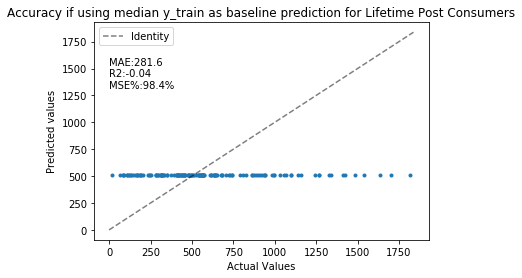

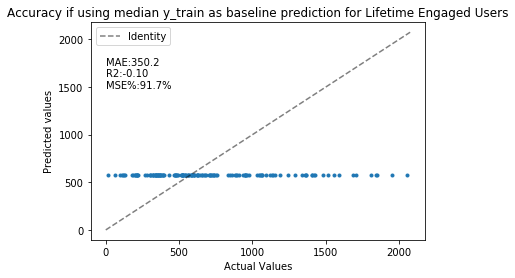

In [30]:
#evaluate performance when predicting for X_test using median y_train as baseline
def evaluate_guess_median(y_test, name, median):
    
    y_pred = np.ones(len(y_test)) * median
    
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)
    print("Accuracy if using median y_train as baseline prediction ({}):\nMSE:{:.2f}, R2:{:.2f}, MAE:{:.2f}".format(name,MSE,R2,MAE))
    mse_percent = sum((abs(y_test - y_pred)/y_test)*100/len(y_test))
    print("MSE Percentage {:.2f}\n".format(mse_percent))
    
    max_scale = y_test.max()
    fig, ax = plt.subplots()
    plt.scatter(y_test, y_pred, marker='.')
    plt.plot(np.arange(0,max_scale*1.01), np.arange(0,max_scale*1.01), 'k--', alpha=0.5, label = "Identity")
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted values")
    ax.set_title("Accuracy if using median y_train as baseline prediction for {}".format(name))
    plt.legend()
    ax.text(0,max_scale*0.8,"MAE:{:.1f}\nR2:{:.2f}\nMSE%:{:.1f}%".format(MAE,R2, mse_percent), va="center", ha="left")
    
evaluate_guess_median(y_test,outcome,y_train.median())
evaluate_guess_median(y2_test,outcome2, y2_train.median())

#### Conclusions

The models developed for the two outcomes did not do too well, with mean absolute error percentage for the test set as follows:
"Lifetime Post Consumers": 64%
"Lifetime Engaged Users": 72% 

R2 scores were also low at 0.3-0.4. 

From the plots of actual values vs predicted values, we see that larger values tend to be underestimated while the converse is true for smaller values.

Nevertheless, the models give an insight into the factors that are likely to impact on the outcomes "Lifetime Post Consumers" and "Lifetime Engaged Users". "Page total likes", "Type_Status" and "TimeOfYear_Q4" are the most important features for both models.

In addition, while the predicted values obtained from the two models are quite far off the mark, they still provide a more accurate estimate than simply assuming a baseline value using the median in the training set. For the latter, mean absolute error percentages were:
"Lifetime Post Consumers": 98.4%
"Lifetime Engaged Users": 91.7% 

I.e. the trained models provided a reduction in error by 20-34% 

Further study could include engineering different features to improve model performance.


#### References
1. (https://scikit-learn.org/stable/)